# Anomaly Detection using STL
## STL: Seasonal-Trend Decomposition using LOESS
### LOESS: LOcally wEighted Scatterplot Smoothing
Sources: [GitHub repo](https://github.com/ritvikmath/Time-Series-Analysis/blob/master/STL%20Decomposition.ipynb) and [YouTube video](https://www.youtube.com/watch?v=1NXryMoU7Ho&list=LL&index=10)    
Feb 17th 2023

In [6]:
import os
from datetime import datetime
from statsmodels.tsa.seasonal import STL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Plot configs:
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plotsize = (22, 5)
plt.rcParams['figure.figsize']= plotsize
# Pandas config
pd.options.display.float_format= '{:,.4f}'.format

In [8]:
print(os.getcwd())

/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series_forecasting/anomaly_detection


## 1) Input Data

In [27]:
filePath = "data/ice_cream_interest.csv"
df = pd.read_csv(filePath, parse_dates= ["month"])
df

,month,interest
0,2004-01-01,13
1,2004-02-01,15
2,2004-03-01,17
3,2004-04-01,19
4,2004-05-01,22
...,...,...
195,2020-04-01,55
196,2020-05-01,71
197,2020-06-01,81
198,2020-07-01,90


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     200 non-null    datetime64[ns]
 1   interest  200 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 KB


## 2) PreProcessing

In [29]:
df.set_index("month", inplace= True)
df

,interest
month,
2004-01-01,13
2004-02-01,15
2004-03-01,17
2004-04-01,19
2004-05-01,22
...,...
2020-04-01,55
2020-05-01,71
2020-06-01,81


`MS` = MonthBegin, the description is located [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

In [31]:
df = df.asfreq(pd.infer_freq(df.index))
df

,interest
month,
2004-01-01,13
2004-02-01,15
2004-03-01,17
2004-04-01,19
2004-05-01,22
...,...
2020-04-01,55
2020-05-01,71
2020-06-01,81


## 3) EDA

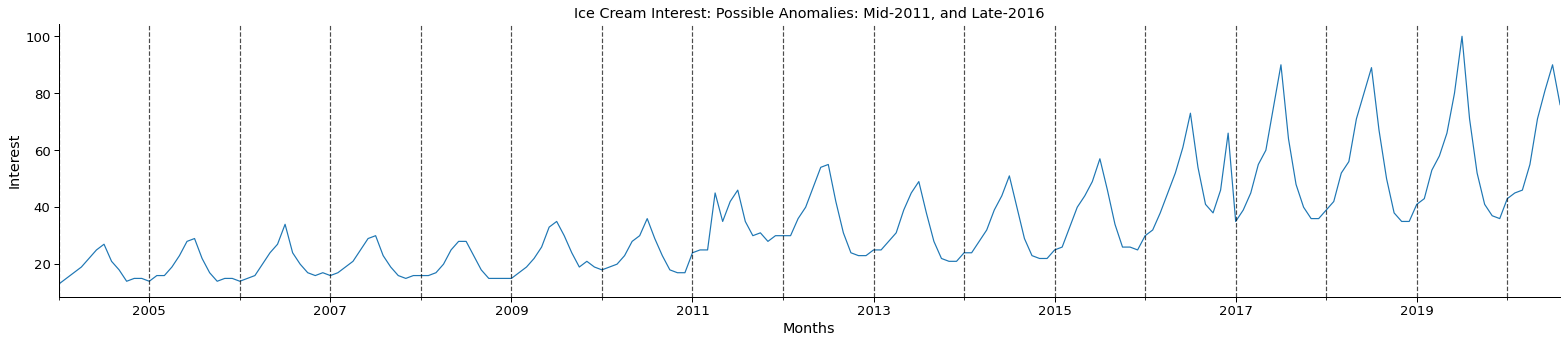

In [40]:
df["interest"].plot()
# Add vertical lines at each year to better visualize the yearly seasonality
for i in range(2004,2021):
    plt.axvline(datetime(i,1,1), color='k', linestyle='--', alpha=0.7)

plt.title("Ice Cream Interest: Possible Anomalies: Mid-2011, and Late-2016")
plt.ylabel("Interest")
plt.xlabel("Months")
plt.tight_layout()

## 4) STL

In [44]:
stl = STL(df)
result = stl.fit()
seasonal, trend, resid = result.seasonal, result.trend, result.resid

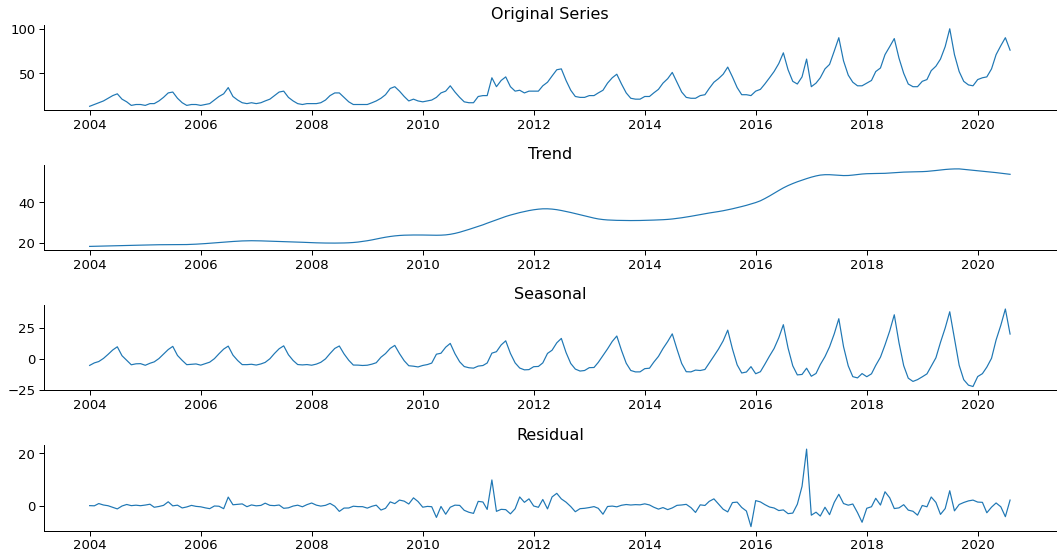

In [58]:
plt.figure(figsize=(15,8))

plt.subplot(4,1,1)
plt.plot(df)
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(resid)
plt.title('Residual', fontsize=16)

plt.tight_layout()

## 5) Series vs. Estimated

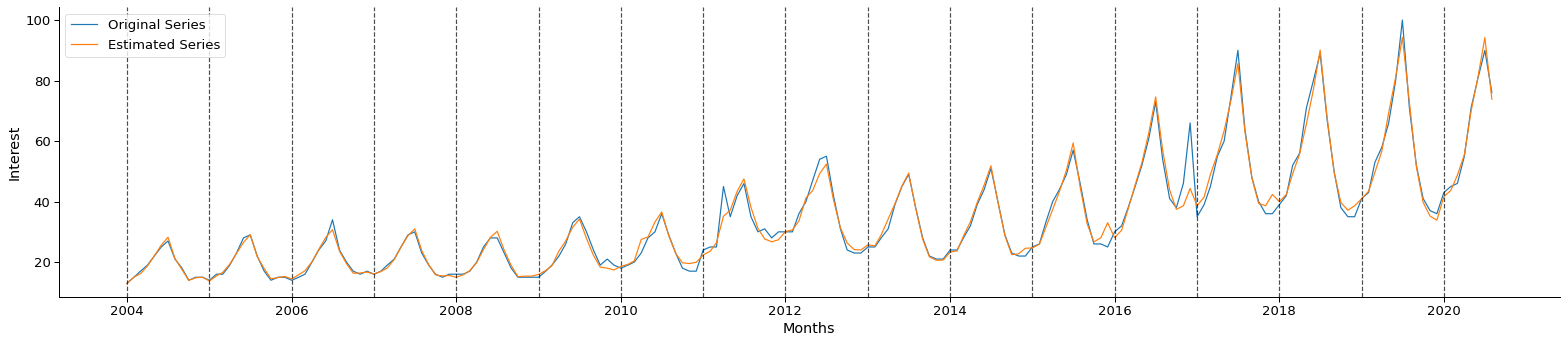

In [66]:
estimated = trend + seasonal
plt.plot(df, label= "Original Series")
plt.plot(estimated, label= "Estimated Series")
# Add vertical lines at each year to better visualize the yearly seasonality
for i in range(2004,2021):
    plt.axvline(datetime(i,1,1), color='k', linestyle='--', alpha=0.7)
plt.ylabel("Interest")
plt.xlabel("Months")    
plt.legend(loc= "upper left")
plt.tight_layout()

## 6) Anomaly Detection

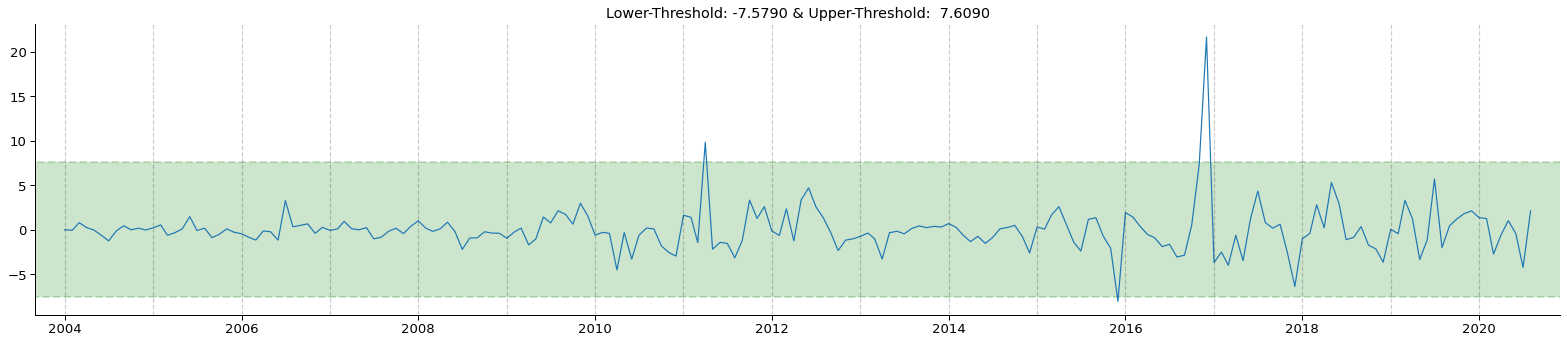

In [93]:
# Define series cutoffs:
resid_mu = resid.mean()
resid_dev = resid.std()

lower = resid_mu - 3*resid_dev
upper = resid_mu + 3*resid_dev

plt.plot(resid)
plt.fill_between([datetime(2003,1,1), datetime(2021,8,1)], lower, upper, alpha= 0.20, color= "g", linestyle= "dashed", linewidth=2)
# For better plotting
plt.xlim(datetime(2003,9,1), datetime(2020,12,1))
for i in range(2004,2021):
    plt.axvline(datetime(i,1,1), color='k', linestyle='--', alpha=0.2)

plt.title(f"Lower-Threshold: {lower: .4f} & Upper-Threshold: {upper: .4f}")    
plt.tight_layout()

In [96]:
# Highlight date anomalies
anomalies = df[(resid < lower) | (resid > upper)]
anomalies

,interest
month,
2011-04-01,45
2015-12-01,25
2016-12-01,66


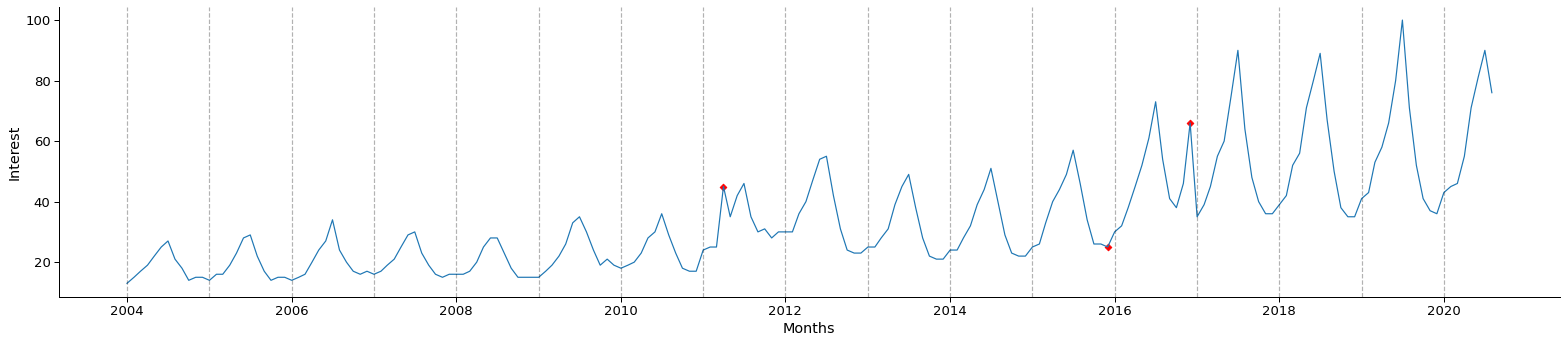

In [105]:
plt.plot(df)
for i in range(2004,2021):
    plt.axvline(datetime(i,1,1), color='k', linestyle='--', alpha=0.3)

# Plot anomalies:
plt.scatter(anomalies.index, anomalies.interest, color='r', marker='D')
plt.ylabel("Interest")
plt.xlabel("Months")
plt.tight_layout()